### [Differential equations, studying the unsolvable](https://www.youtube.com/watch?v=p_di4Zn4wz4)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

θ: 角度

ω: 角速度

α: 角加速度

g: 重力加速度

L: 擺長

μ: 空氣阻力比

g sinθ = L α

dθ = ω * dt

dω = α * dt

α = -g * np.sin(θ) - (μ * ω)

Text(0.35355339059327373, -0.3535533905932738, '90.0')

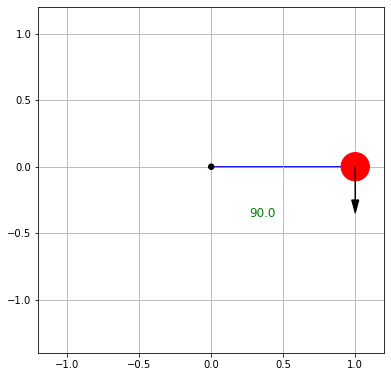

In [2]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
ax.axis([-1.2, 1.2, -1.4, 1.2])
ax.grid()

θ = np.pi/2
ω = -5
p = 1 * np.exp(1j * θ)

ax.plot([0, p.imag], [0, -p.real], lw=1.8, c='b', zorder=1)
ax.scatter([0, p.imag], [0, -p.real], s=[30, 800], c=['k', 'r'], zorder=2)
# ax.arrow(p.imag, -p.real, 0, -0.2, head_width=0.05, head_length=0.1, fc='k', ec='k', zorder=3)
ωθ = θ + (np.sign(ω) * np.pi)
ωv = ω * np.exp(1j * θ) / 20
ax.arrow(p.imag, -p.real, ωv.real, ωv.imag, head_width=0.01*abs(ω), head_length=0.02*abs(ω), fc='k', ec='k', zorder=3)
θp = 0.5 * np.exp(1j * θ / 2)
ax.text(θp.imag, -θp.real, '%.1f'%(np.rad2deg(θ)), c='g', size=12, ha='center', va='center')


In [3]:
g = 9.81
L = 1
μ = 0.25
dt = 0.0001

θ_init = -np.pi/2 # 起始值
ω_init = 7.2 # 起始值
θ = θ_init
ω = ω_init
s = 15 # 秒數設定
n = int(s / dt)
arr_θ = [θ] # 座標紀錄
arr_ω = [ω] # 座標紀錄
for i in range(n):
    α = -g * np.sin(θ) - (μ * ω)
    θ += ω * dt
    ω += α * dt
    arr_θ.append(θ)
    arr_ω.append(ω)
    
arr_θ = np.array(arr_θ)
arr_ω = np.array(arr_ω)

[-1.2, 1.2, -1.4, 1.2]

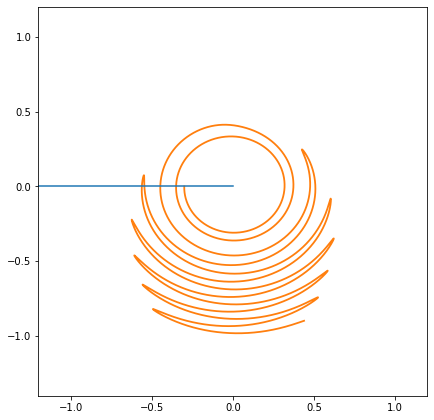

In [4]:
# 擺動示意
p = np.exp(1j * arr_θ) * np.linspace(0.3, 1.0, n+1)
plt.figure(figsize=(6, 6))
ax = plt.axes([0.5, 0.5, 0.9, 0.9])
ax.plot([0, 2*np.exp(1j * θ_init).imag], [0, -2*np.exp(1j * θ_init).real])
ax.plot(p.imag, -p.real, lw=1.8, zorder=1)
ax.axis([-1.2, 1.2, -1.4, 1.2])

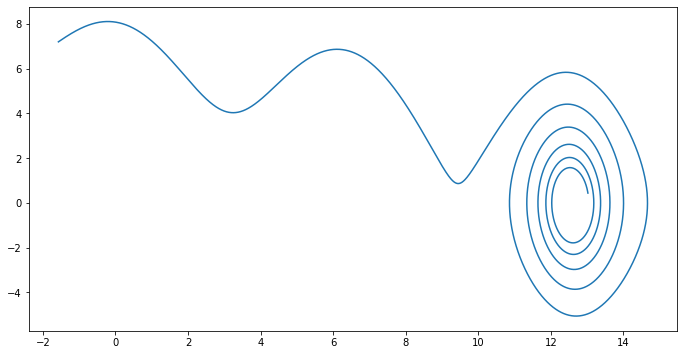

In [5]:
# 座標移動軌跡
p = np.exp(1j * arr_θ) * np.linspace(1, 1.5, n+1)
plt.figure(figsize=(10, 5))
ax = plt.axes([0.5, 0.5, 0.9, 0.9])
ax.plot(arr_θ[:], arr_ω[:])

In [ ]:
min_θ = -np.pi
max_θ = 5*np.pi
min_ω = -10
# 範圍設置
θ = np.linspace(min_θ, max_θ, 500)
ω = np.linspace(min_ω, -min_ω, 200)
x, y = np.meshgrid(θ, ω) # 網格
u = y # 向量
v = -g * np.sin(x) - (μ * y) # 向量
c = (u**2 + v**2)**0.5 # 顏色設定

# 座標大圖
fig = plt.figure(figsize=(15, 7.5))
ax = plt.axes([0.05, 0.05, 0.9, 0.9])
ax.grid()
ax.axis([min_θ, max_θ, min_ω, -min_ω])
plt.xticks(np.pi*np.arange(-1, 6), ['-π', '0', 'π', '2π', '3π', '4π', '5π'])
ax.streamplot(x, y, u, v, density=1.6, color=c, linewidth=1)
ax.arrow(min_θ, 0, 18.65, 0, head_width=0.5, head_length=0.2, fc='k', ec='k', zorder=3)
ax.arrow(0, min_ω, 0, 19.4, head_width=0.2, head_length=0.6, fc='k', ec='k', zorder=3)

# 擺動小圖
ax2 = plt.axes([0.06, 0.08, 0.2, 0.40])
ax2.axis([-1.2, 1.2, -1.4, 1.2])
plt.xticks([])
plt.yticks([])


fig_n = 0
eles = []
for i in range(0, arr_θ.shape[0], 100):
    eles = [] # 各圖形元素放入列表
    
    eles.append(ax.plot(arr_θ[0:i], arr_ω[0:i], c='r', lw=2.5)[0]) # 軌跡紀錄
    eles.append(ax.plot(arr_θ[i], arr_ω[i], 'ro')[0]) # 軌跡
    
    # 小圖擺
    θ = arr_θ[i]
    ω = arr_ω[i]
    p = 1 * np.exp(1j * θ)
    eles.append(ax2.plot([0, p.imag], [0, -p.real], lw=1.8, c='b', zorder=1)[0])
    eles.append(ax2.scatter([0, p.imag], [0, -p.real], s=[30, 500], c=['k', 'r'], zorder=2))
    eles.append(ax2.arrow(p.imag, -p.real, 0, -0.2, head_width=0.05, head_length=0.1, fc='k', ec='k', zorder=3))
    ωθ = θ + (np.sign(ω) * np.pi)
    ωv = ω * np.exp(1j * θ) / 20
    eles.append(ax2.arrow(p.imag, -p.real, ωv.real, ωv.imag, head_width=0.01*abs(ω), head_length=0.02*abs(ω), fc='orange', ec='orange', zorder=3))
    
    θp = 0.5 * np.exp(1j * (θ+np.deg2rad(20)))
    eles.append(ax2.text(θp.imag, -θp.real, '%.1f'%(np.rad2deg(θ)), c='g', size=12, ha='center', va='center'))

    fig.savefig(f'{fig_n}.png')
    fig_n += 1
    for ele in eles: # 刪除圖表元素在重畫
        ele.remove()
    del eles

![](ode2.png)